In [1]:
'''
Here we plot the dynamical compensation figure
(figure 2 in 14.3.19 version of the manuscript)
'''
import numpy as np
from scipy.integrate import odeint
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.gridspec as grd
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [2]:
def get5eqsparams(timescale='day'):
    #parameters are from the paper Mathematical modeling of the hypothalamic-pituitary-adrenal gland (HPA) axis, including hippocampal mechanisms.
    #Andersen M1, Vinther F, Ottesen JT.
    
    a1=0.1731 #[1/min]
    a2=0.0348 #[1/min]
    a3=0.009071 #[1/min]

    #mitosis every 63 days according to Nolan et al
    #aP=1/63/(60*24)
    aP=1/60/(60*24)
    
    
    # turnover of 60 days according to Kataoka et al
    aA=1/60/(60*24)

    
    #We normalize all means to 1, we therefore get
    b1=a1;b2=a2;b3=a3;bA=aA;bP=aP;
    
    res=np.array([a1,a2,a3,aA,aP,b1,b2,b3,bA,bP])
    
    if timescale=='hour':
        res=60*res
    
    if timescale=='day':
        res=24*60*res
    
    return res

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


Text(0.5,0,'Time [month]')

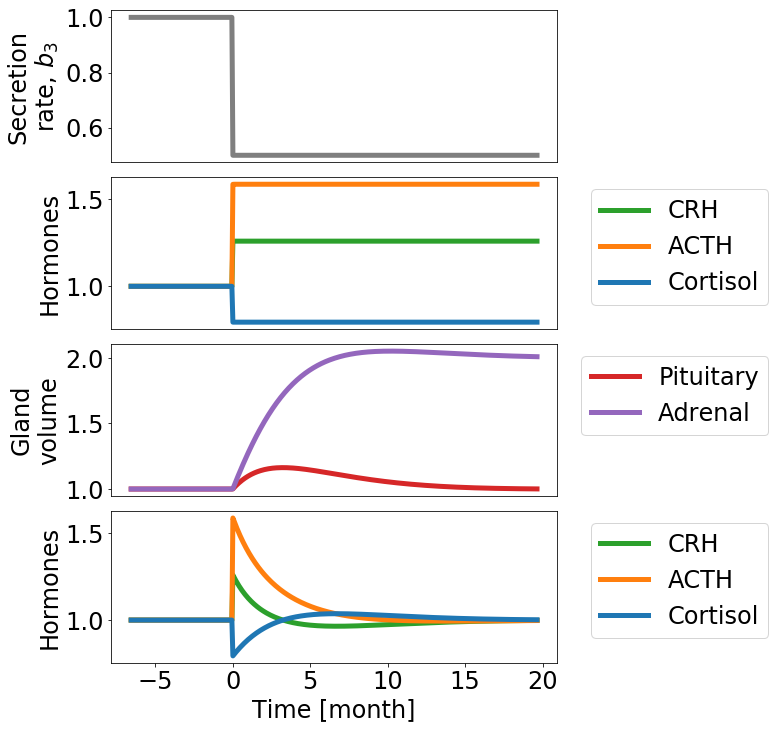

In [3]:
'''
Here we simulate a change in a parameter (b3), and how the glands
dynamically compensate for this change
'''

def b3func(t):
    return 0.75-0.25*np.sign(t)

def const_inp(t):
    return 1

def HPASimulationb3(y,t,timescale='day',b3=b3func,inp=const_inp):
    '''
    Here we simulate the full equations of the hormones and
    glands for a change in b3
    '''
    [a1_,a2_,a3_,aA_,aP_,b1_,b2_,b3_,bA_,bP_]=get5eqsparams(timescale)
    [x1_,x2_,x3_,A_,P_]=y
    dy=np.empty(5)
    u_=inp(t)
    #Change in b3 volume:
    b3_=b3_*b3(t)
    dy[0]= u_*b1_/x3_-a1_*x1_ #CRH
    dy[1]= b2_*x1_*P_/x3_-a2_*x2_ #ACTH
    dy[2]= b3_*x2_*A_-a3_*x3_ #Cortisol 
    dy[3]= A_*(bA_*x2_-aA_) #Adrenal cells
    dy[4]= P_*(bP_*x1_-aP_) #Pituitary cells
    return dy

def HPASimulationb3fast(y,t,timescale='day',b3=b3func,inp=const_inp):
    '''
    Here we simulate only the hormones for a change in b3,
    assuming the glands do not compensate
    '''
    [a1_,a2_,a3_,aA_,aP_,b1_,b2_,b3_,bA_,bP_]=get5eqsparams(timescale)
    [x1_,x2_,x3_]=y
    dy=np.empty(3)
    u_=inp(t)
    #Change in b3 volume:
    b3_=b3_*b3(t)
    dy[0]= u_*b1_/x3_-a1_*x1_ #CRH
    dy[1]= b2_*x1_/x3_-a2_*x2_ #ACTH
    dy[2]= b3_*x2_-a3_*x3_ #Cortisol 
    return dy

matplotlib.rcParams.update({'font.size': 24})
start_=-200
end_=400
#The simulation itself
t_seg=np.linspace(start_,end_-start_-1,end_)
sol=odeint(lambda y,t:HPASimulationb3(y,t,timescale='day',b3=b3func,inp=const_inp),[1,1,1,1,1],t_seg)
solfast=odeint(lambda y,t:HPASimulationb3fast(y,t,timescale='day',b3=b3func,inp=const_inp),[1,1,1],t_seg)
def_color=plt.rcParams['axes.color_cycle']


fig=plt.figure(figsize=(8,2))
gs = grd.GridSpec(4, 1,hspace=0.1, wspace=0.1)


#Plot of the change in b3
plt.figure(figsize=(8,12))
plt.subplot(gs[0])
plt.plot(t_seg/30.5,b3func(t_seg),color=def_color[7],linewidth=5)
plt.xticks([])
plt.ylabel('Secretion\nrate, $b_3$')

#Plot of the hormones in a model without tissue turnover
plt.subplot(gs[1])
plt.plot(t_seg/30.5,solfast[:,0],'-',color=def_color[2],linewidth=5)
plt.plot(t_seg/30.5,solfast[:,1],'-',color=def_color[1],linewidth=5)
plt.plot(t_seg/30.5,solfast[:,2],'-',color=def_color[0],linewidth=5)
plt.legend(['CRH','ACTH','Cortisol'], bbox_to_anchor=(1.5,1))
plt.xticks([])
plt.ylabel('Hormones')


#Plot of the glands in a model with tissue turnover
plt.subplot(gs[2])
plt.plot(t_seg/30.5,sol[:,4],'-',color=def_color[3],linewidth=5)
plt.plot(t_seg/30.5,sol[:,3],'-',color=def_color[4],linewidth=5)
plt.xticks([])
plt.ylabel('Gland\nvolume')
plt.legend(['Pituitary','Adrenal'], bbox_to_anchor=(1.5,1))

#Plot of the hormones in a model with tissue turnover
plt.subplot(gs[3])
plt.plot(t_seg/30.5,sol[:,0],'-',color=def_color[2],linewidth=5)
plt.plot(t_seg/30.5,sol[:,1],'-',color=def_color[1],linewidth=5)
plt.plot(t_seg/30.5,sol[:,2],'-',color=def_color[0],linewidth=5)
plt.legend(['CRH','ACTH','Cortisol'], bbox_to_anchor=(1.5,1))
plt.ylabel('Hormones')
plt.xlabel('Time [month]')

/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


Text(0.5,0,'Time [month]')

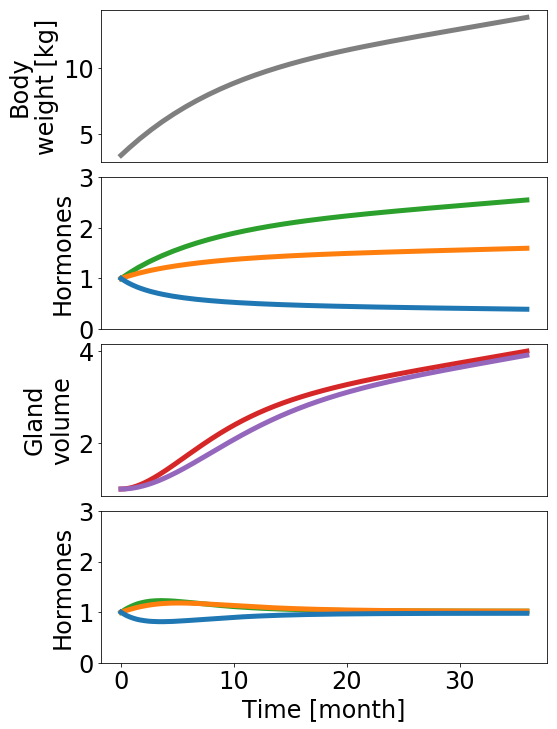

In [4]:
'''
Here we simulate the effect of tissue turnover in the glands 
during growth

Growth curves for girls were obtained from:
https://www.cdc.gov/growthcharts/html_charts/wtageinf.htm#females
'''

girls_curve=pd.read_excel('../data/girls_growth_curve.xlsx')
age=girls_curve['Age (in months)']
median_weight=girls_curve['50th Percentile Weight (in kilograms)']

def girl_blood_vol(t,age=age,median_weight=median_weight):
    #Interpolation of girl blood volume as function of t (age in days)
    t_month=t/30.5
    return np.interp(t_month,age,median_weight)/median_weight[0]

def HPASimulationBloodVolume(y,t,timescale='day',blood_volume=girl_blood_vol,inp=const_inp):
    '''
    Here we simulate the full equations of the hormones and
    glands for growth
    '''
    [a1_,a2_,a3_,aA_,aP_,b1_,b2_,b3_,bA_,bP_]=get5eqsparams(timescale)
    [x1_,x2_,x3_,A_,P_]=y
    dy=np.empty(5)
    u_=inp(t)
    #Change in blood volume:
    b2_=b2_/blood_volume(t)
    b3_=b3_/blood_volume(t)
    dy[0]= u_*b1_/x3_-a1_*x1_ #CRH
    dy[1]= b2_*x1_*P_/x3_-a2_*x2_ #ACTH
    dy[2]= b3_*x2_*A_-a3_*x3_ #Cortisol 
    dy[3]= A_*(bA_*x2_-aA_) #Adrenal cells
    dy[4]= P_*(bP_*x1_-aP_) #Pituitary cells
    return dy

def HPASimulationBloodVolumeFast(y,t,timescale='day',blood_volume=girl_blood_vol,inp=const_inp):
    '''
    Here we simulate only the equations for the hormones 
    without tissue turnover for the case of growth
    '''
    [a1_,a2_,a3_,aA_,aP_,b1_,b2_,b3_,bA_,bP_]=get5eqsparams(timescale)
    [x1_,x2_,x3_]=y
    dy=np.empty(3)
    u_=inp(t)
    #Change in blood volume:
    b2_=b2_/blood_volume(t)
    b3_=b3_/blood_volume(t)
    dy[0]= u_*b1_/x3_-a1_*x1_ #CRH
    dy[1]= b2_*x1_/x3_-a2_*x2_ #ACTH
    dy[2]= b3_*x2_-a3_*x3_ #Cortisol 
    return dy


#The simulation itself
start_=0
end_=int(36*30.5)
t_seg=np.linspace(start_,end_-start_-1,end_)
sol=odeint(lambda y,t:HPASimulationBloodVolume(y,t,timescale='day',blood_volume=girl_blood_vol,inp=const_inp),[1,1,1,1,1],t_seg)
solfast=odeint(lambda y,t:HPASimulationBloodVolumeFast(y,t,timescale='day',blood_volume=girl_blood_vol,inp=const_inp),[1,1,1],t_seg)

def_color=plt.rcParams['axes.color_cycle']


fig=plt.figure(figsize=(8,2))
gs = grd.GridSpec(4, 1,hspace=0.1, wspace=0.1)

#Plot of body weight of a median girl
plt.figure(figsize=(8,12))
plt.subplot(gs[0])
plt.plot(t_seg/30.5,median_weight[0]*girl_blood_vol(t_seg),color=def_color[7],linewidth=5)
plt.xticks([])
plt.ylabel('Body\nweight [kg]')

#Plot of hormone levels in a model without tissue turnover
plt.subplot(gs[1])
plt.plot(t_seg/30.5,solfast[:,0],'-',color=def_color[2],linewidth=5)
plt.plot(t_seg/30.5,solfast[:,1],'-',color=def_color[1],linewidth=5)
plt.plot(t_seg/30.5,solfast[:,2],'-',color=def_color[0],linewidth=5)
plt.xticks([])
plt.ylim([0,3])
plt.ylabel('Hormones')

#Plot of gland sizes in a model with tissue turnover
plt.subplot(gs[2])
plt.plot(t_seg/30.5,sol[:,4],'-',color=def_color[3],linewidth=5)
plt.plot(t_seg/30.5,sol[:,3],'-',color=def_color[4],linewidth=5)
plt.xticks([])
plt.ylabel('Gland\nvolume')

#Plot of hormone levels in a model with tissue turnover
plt.subplot(gs[3])
plt.plot(t_seg/30.5,sol[:,0],'-',color=def_color[2],linewidth=5)
plt.plot(t_seg/30.5,sol[:,1],'-',color=def_color[1],linewidth=5)
plt.plot(t_seg/30.5,sol[:,2],'-',color=def_color[0],linewidth=5)
plt.ylabel('Hormones')
plt.ylim([0,3])

plt.xlabel('Time [month]')